In [1]:
from fastai.vision.all import *
from fastai.vision.widgets import *
from fastai.callback.fp16 import *

In [2]:
path = Path("/storage/cs7643/images/")

In [3]:
fns = get_image_files(path)
fns

(#101000) [Path('/storage/cs7643/images/chocolate_mousse/1667209.jpg'),Path('/storage/cs7643/images/chocolate_mousse/3511892.jpg'),Path('/storage/cs7643/images/chocolate_mousse/1347268.jpg'),Path('/storage/cs7643/images/chocolate_mousse/1092783.jpg'),Path('/storage/cs7643/images/chocolate_mousse/1402394.jpg'),Path('/storage/cs7643/images/chocolate_mousse/3747713.jpg'),Path('/storage/cs7643/images/chocolate_mousse/116066.jpg'),Path('/storage/cs7643/images/chocolate_mousse/3413472.jpg'),Path('/storage/cs7643/images/chocolate_mousse/1478338.jpg'),Path('/storage/cs7643/images/chocolate_mousse/1407108.jpg')...]

In [4]:
recipes = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter=RandomSplitter(valid_pct=0.2),
    get_y = parent_label,
    item_tfms = RandomResizedCrop(336, min_scale=0.5),
    batch_tfms=aug_transforms()
)

In [5]:
dls = recipes.dataloaders(path)

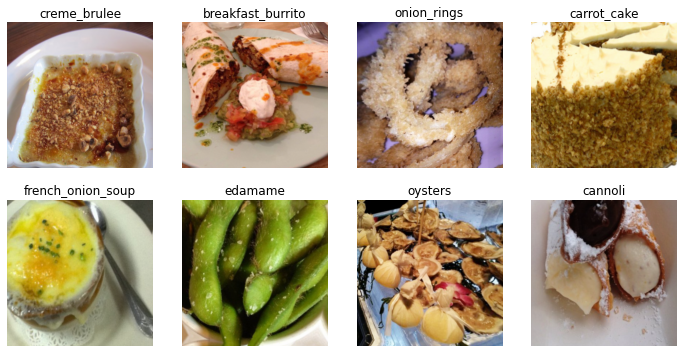

In [6]:
dls.train.show_batch(max_n=8, nrows=2)

In [7]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(2)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,2.136091,1.566798,0.408515,08:34


epoch,train_loss,valid_loss,error_rate,time
0,1.352959,1.054832,0.282178,10:45
1,0.997591,0.815443,0.217277,10:47


In [9]:
learn.export(fname="resnet34_out.pkl")

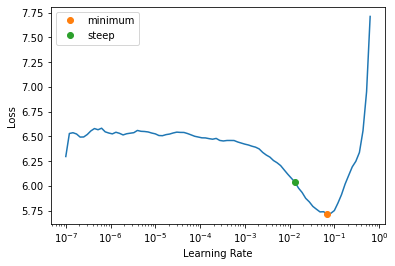

In [10]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
lr_min, lr_steep = learn.lr_find(suggest_funcs=(minimum, steep))

In [11]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(2, base_lr=9e-3)

epoch,train_loss,valid_loss,error_rate,time
0,1.980949,1.508119,0.392624,08:37


epoch,train_loss,valid_loss,error_rate,time
0,1.565969,1.298887,0.344653,11:01
1,0.976285,0.803522,0.214455,10:55


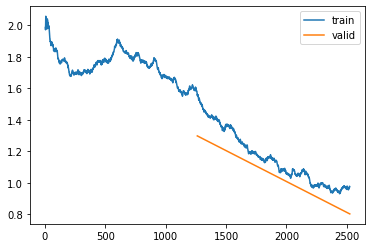

In [12]:
learn.recorder.plot_loss()

In [13]:
learn.export(fname="resnet34_out_lr.pkl")

In [16]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fit_one_cycle(3, 9e-3)

epoch,train_loss,valid_loss,error_rate,time
0,2.130385,1.943989,0.497079,08:33
1,1.620895,1.253884,0.334208,08:54
2,1.358314,1.062633,0.281782,08:41


(0.00012022644514217973, 6.918309736647643e-06)

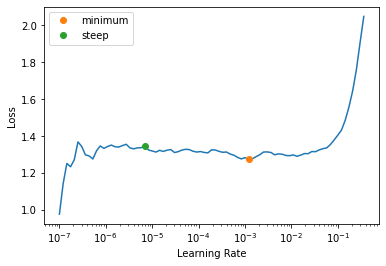

In [17]:
lr_min, lr_steep = learn.lr_find(suggest_funcs=(minimum, steep))
lr_min, lr_steep

In [7]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fit_one_cycle(3, 1e-2)
learn.unfreeze()
learn.fit_one_cycle(6, lr_max=slice(1e-5,1e-3))

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,2.109921,2.116688,0.533861,09:06
1,1.617044,1.267751,0.332723,08:56
2,1.350309,1.104536,0.290941,08:56


epoch,train_loss,valid_loss,error_rate,time
0,1.341566,1.093420,0.290149,10:59
1,1.217808,1.047484,0.280842,11:06
2,1.054146,0.885180,0.236089,11:04
3,0.884816,0.785896,0.209208,10:52
4,0.719100,0.728033,0.193119,11:00
5,0.662809,0.719300,0.190099,11:13


In [8]:
learn.export("resnet_finetune.pkl")

In [9]:
interp = ClassificationInterpretation.from_learner(learn)

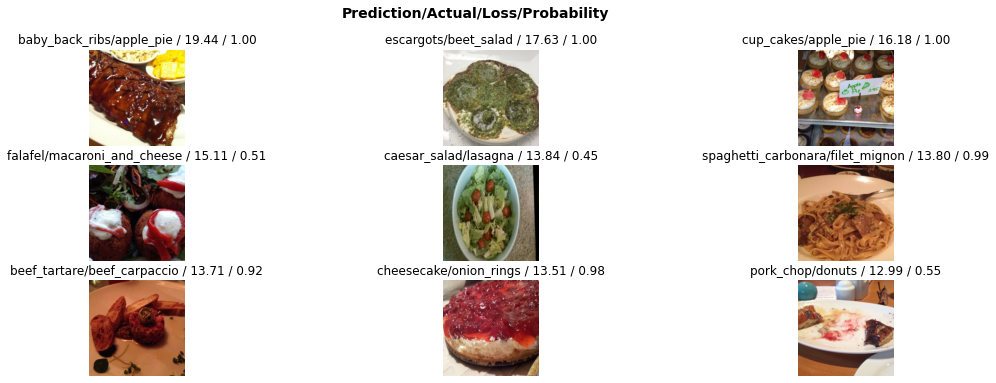

In [10]:
interp.plot_top_losses(10, nrows=3, figsize=(18, 6))

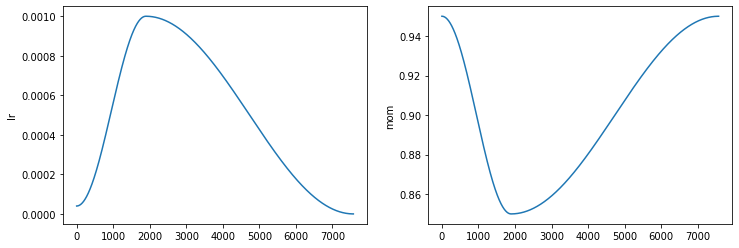

In [18]:
learn.recorder.plot_sched()

SuggestedLRs(valley=9.120108734350652e-05)

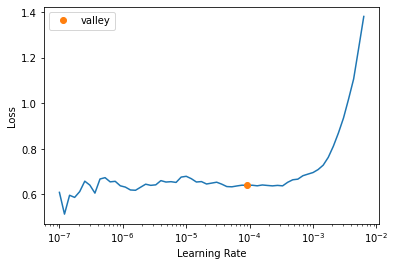

In [28]:
learn.lr_find()